### 1 Imports functions from the `cst.py` script, which has to be in the same directory as this notebook

In [1]:
from cst import *

### 2 Locate files [EDIT]

In [2]:
#EDIT, filenames with spaces don't quite work and so please replace with underscores first
INPUT_ND2 = '/Volumes/DATA/Calcium/082624_tag-tph_patch_exp002.nd2'
SCRATCH_PATH = '/Volumes/DATA'
OUTPUT_PATH = '/Users/albertwang/Desktop'

if not os.path.isfile(INPUT_ND2):
    raise FileNotFoundError()

### 3 Initialize scratch directory

In [3]:
scratch_dir = make_scratch_dir(INPUT_ND2, SCRATCH_PATH)
scratch_dir

'/Volumes/DATA/082624_tag-tph_patch_exp002-scratch'

### 4 Register the GFP camera to the RFP camera by using only the first brightfield frame

In [4]:
%%time

#params = align_cameras(INPUT_ND2, scratch_dir)
#print(params.GetParameterMap(0)['TransformParameters'])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs


### 5 Convert the rest of the `.nd2` to a registered `.tif`

In [5]:
%%time

#make_tif(INPUT_ND2, scratch_dir, params)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.15 μs


### 6 Make a mask for blob detection only

CPU times: user 11 ms, sys: 5.65 ms, total: 16.7 ms
Wall time: 71.4 ms


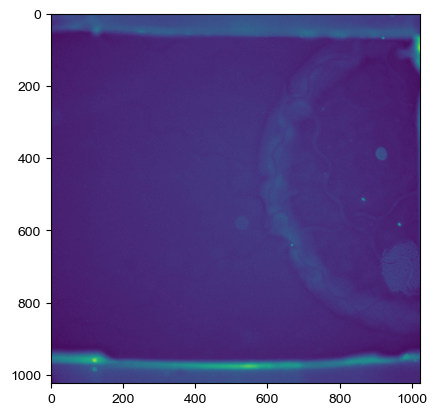

In [6]:
%%time

#mask = make_mask(scratch_dir)
mask = tifffile.imread(os.path.join(scratch_dir, 'mask.tif'))
plt.imshow(mask[0])

### 7 Check blob detection params first

In [7]:
SIGMA = 10
THRESH = 0.8
INNER_RADIUS = 15
OUTER_RADIUS = 25

#check_params(scratch_dir, mask, SIGMA, THRESH, INNER_RADIUS, OUTER_RADIUS)

### 8 Detect blobs for each frame with the params from above

In [8]:
%%time

MAX_FRAME = 6000

#write_blobs(scratch_dir, mask, SIGMA, THRESH, INNER_RADIUS, OUTER_RADIUS, MAX_FRAME)

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 1.67 μs


### 9 Link blobs to make tracks

CPU times: user 609 ms, sys: 30.3 ms, total: 639 ms
Wall time: 654 ms


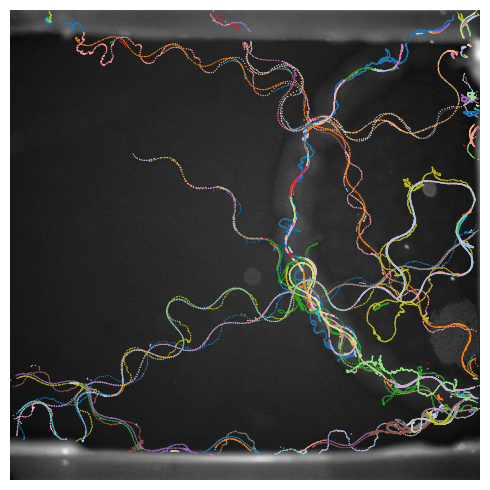

In [9]:
%%time

SEPERATION = 15

#link_worms(scratch_dir, SEPERATION)
plot_tracks(scratch_dir, mask, 'untrimmed')

### 10 Save only the important tracks

In [13]:
%matplotlib qt

pts = select_tracks(scratch_dir, mask)
assert False, 'breakpoint'

AssertionError: breakpoint

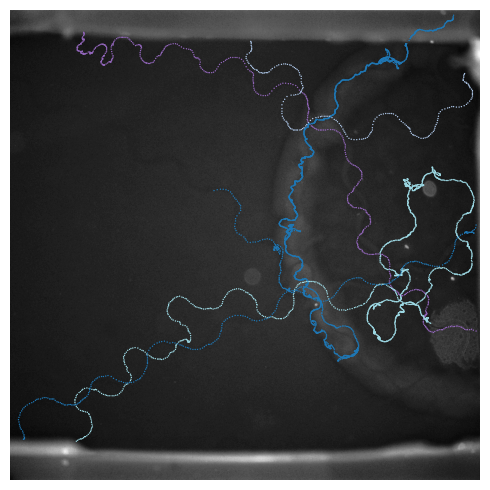

In [14]:
%matplotlib inline

trimmed_df = trim(scratch_dir, pts)
plot_tracks(scratch_dir, mask, 'trimmed')

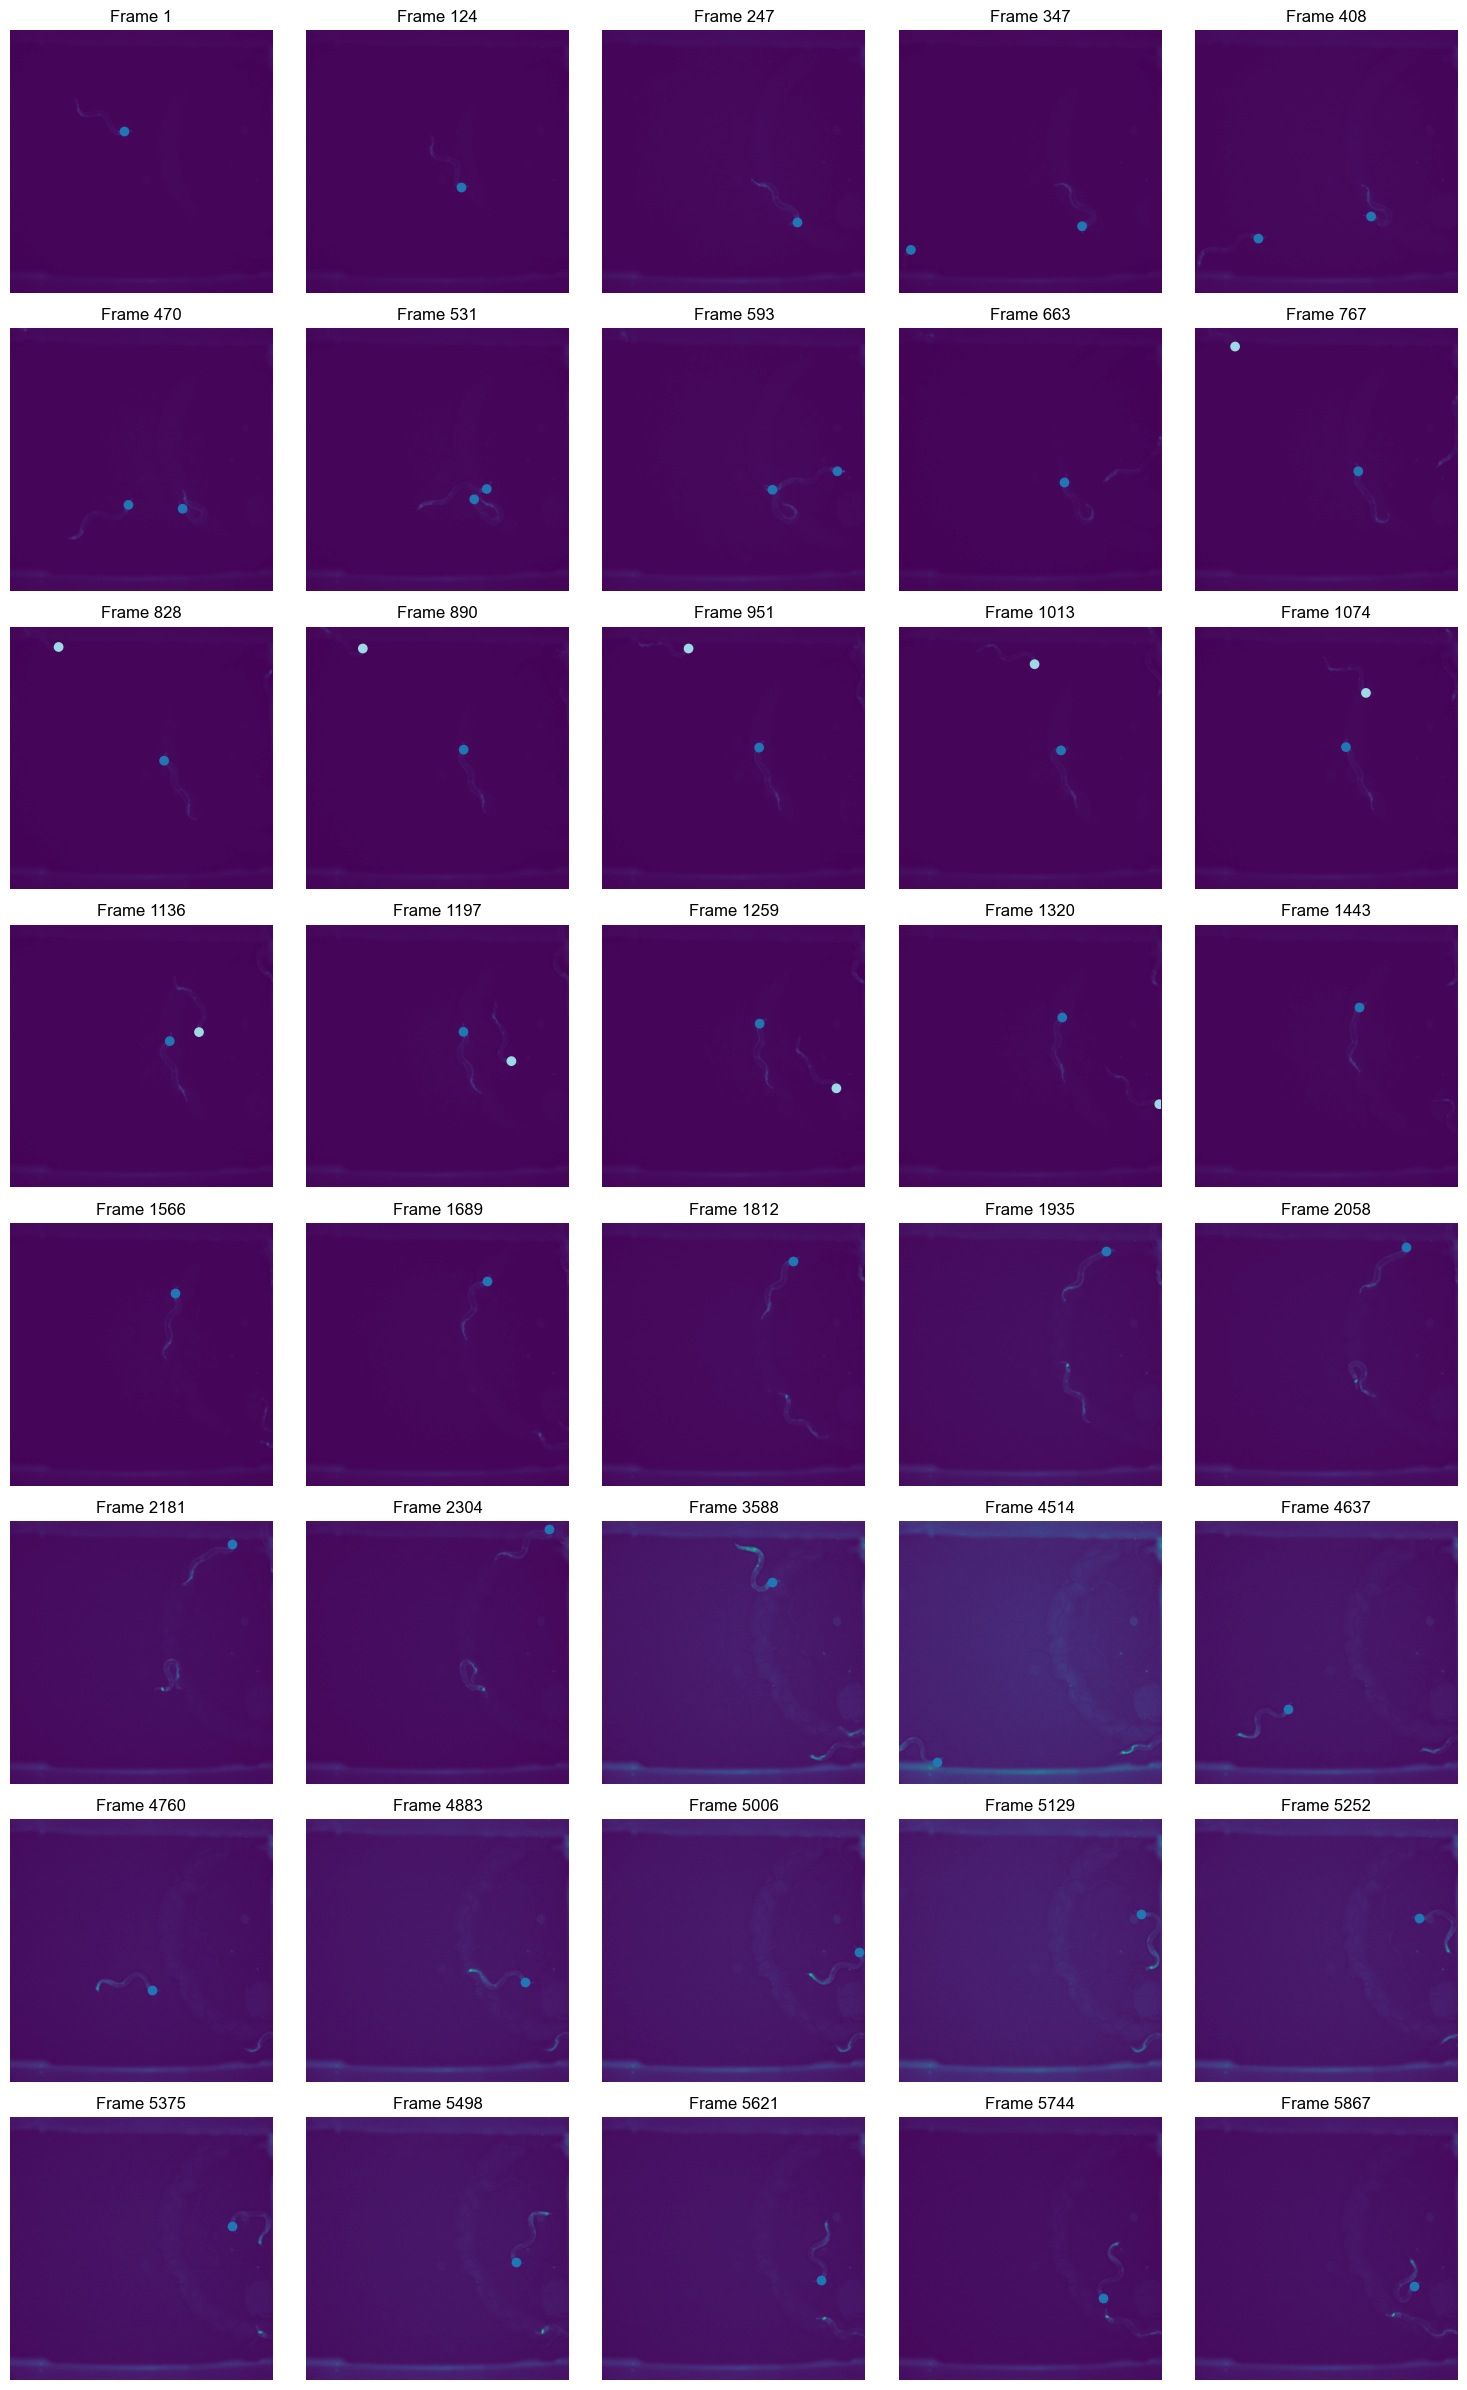

In [15]:
double_check_ids(scratch_dir)

### 11 Select patch

In [16]:
%matplotlib qt

patch_pts = select_patch(scratch_dir)
assert False, 'breakpoint'

AssertionError: breakpoint

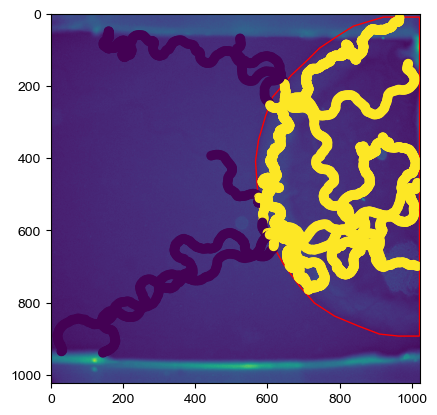

In [17]:
%matplotlib inline

add_patch_to_df(trimmed_df, scratch_dir, patch_pts)

### N Copy and rename the files to the output directory

In [18]:
copy_to_output(INPUT_ND2, OUTPUT_PATH, scratch_dir)

### N Delete the scratch directory on your own

In [19]:
os.system('rm -rf %s' % scratch_dir)

0